In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [3]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [4]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

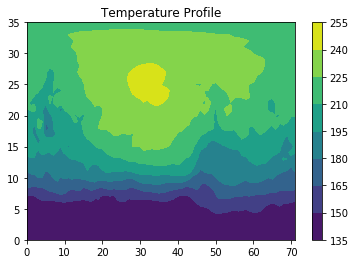

In [5]:
example_data = T[50,5,:, :]
plt.contourf(example_data)
plt.colorbar()
plt.title("Temperature Profile")
plt.show()

In [6]:
albedo = DS.ALBEDO.values

In [7]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [8]:
st = DS.TSK.values

In [9]:
st.shape

(240, 36, 72)

In [10]:
d_c = DS.TAU_OD.values

In [11]:
d_c.shape 

(240, 52, 36, 72)

In [12]:
tsf = DS.TOASW.values #top solar flux

In [13]:
tsf.shape

(240, 36, 72)

In [14]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [15]:
bsf.shape

(240, 36, 72)

Let's combine the data together, for the equator line

In [16]:
e_in = [] #equator input
e_out = [] #equator output
e_t = [] #equator input and output
for i in range(240):
    for j in range(72):
        input_array = list(T[i,:,18,j]) #start with temp profile
        input_array+=list(d_c[i,:,18,j]) #add dust profile
        input_array.append(albedo[i,18,j])#add albedo
        input_array.append(st[i,18,j])#add surface temp
        input_array.append(tsf[i,18,j]) #add top solar flux
        e_in.append(input_array) #appends input to input array
        e_out.append(bsf[i,18,j]) #appends output to output array
        total_array = input_array + [bsf[i,18,j]] #adds input and output data together
        e_t.append(total_array) #appends everything to total array

In [17]:
e_t = np.array(e_t)
e_t.shape

(17280, 108)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(e_t)
a_t = scaler.transform(e_t)

In [19]:
e_t

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26558  , 229.31334  , 231.98065  , ..., 187.20706  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.2537   , 229.8646   , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45032  , 232.25151  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [20]:
a_t

array([[0.7235944 , 0.86352885, 0.8959441 , ..., 0.38041532, 0.09326209,
        0.0493786 ],
       [0.6461687 , 0.8367299 , 0.87118983, ..., 0.31293392, 0.01814741,
        0.00695281],
       [0.6035547 , 0.8138596 , 0.84642625, ..., 0.26337886, 0.        ,
        0.        ],
       ...,
       [0.8248186 , 0.7983631 , 0.77745795, ..., 0.92279553, 0.94047093,
        0.8609505 ],
       [0.8871317 , 0.8693553 , 0.8545749 , ..., 0.9563103 , 0.9663615 ,
        0.8867595 ],
       [0.9280405 , 0.9139615 , 0.9019637 , ..., 0.9790988 , 0.9849983 ,
        0.90444124]], dtype=float32)

In [21]:
scaler.inverse_transform(a_t) #we can inverse the scaling!

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26556  , 229.31335  , 231.98065  , ..., 187.20708  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.25371  , 229.86458  , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45033  , 232.25153  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [22]:
scaler2 = MinMaxScaler()
scaler2.fit(e_t[:,107].reshape(-1,1))
a_t_out = scaler2.transform(e_t[:,107].reshape(-1,1))

In [23]:
a_t_out

array([[0.0493786 ],
       [0.00695281],
       [0.        ],
       ...,
       [0.8609505 ],
       [0.8867595 ],
       [0.90444124]], dtype=float32)

In [24]:
scaler2.inverse_transform(a_t_out)

array([[ 20.28048 ],
       [  2.855617],
       [  0.      ],
       ...,
       [353.60437 ],
       [364.20447 ],
       [371.4666  ]], dtype=float32)

In [25]:
e_in = np.array(e_in)
e_out = np.array(e_out)

In [26]:
np.array_equal(e_in,e_t[:,:107])

True

In [27]:
np.array_equal(e_out,e_t[:,107]) #we can just use e_t array...

True

In [28]:
e_d = pd.DataFrame(e_t) 
e_d

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,221.715240,231.726807,234.095932,234.503632,234.329010,233.942673,233.464264,232.940186,232.390991,231.818634,...,8.481921e-08,5.586889e-08,3.514140e-08,2.067390e-08,1.108751e-08,5.375729e-09,0.258120,196.739227,49.710243,20.280479
1,214.265579,229.313339,231.980652,233.091660,233.244293,233.042313,232.685272,232.249969,231.769409,231.259506,...,8.633013e-08,5.685386e-08,3.574981e-08,2.101948e-08,1.125893e-08,5.443385e-09,0.255179,187.207062,9.672873,2.855617
2,210.165375,227.253693,229.864594,231.590607,231.866180,231.756638,231.457138,231.062225,230.613007,230.131134,...,8.785055e-08,5.784503e-08,3.636205e-08,2.136724e-08,1.143143e-08,5.511467e-09,0.261824,180.207108,0.000000,0.000000
3,204.305664,220.883759,226.787598,229.156601,230.048355,230.277405,230.192307,229.942062,229.589310,229.168213,...,8.428513e-08,5.552072e-08,3.492633e-08,2.055174e-08,1.102691e-08,5.351814e-09,0.259610,176.107941,0.000000,0.000000
4,200.434067,214.538086,221.359314,224.568710,226.002594,226.618210,226.815628,226.775070,226.599731,226.295593,...,7.919467e-08,5.220223e-08,3.287652e-08,1.938745e-08,1.044937e-08,5.123874e-09,0.256876,171.112762,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,225.466187,220.502090,218.717804,217.574936,216.752670,216.058411,215.427002,214.830536,214.254379,213.691330,...,8.334755e-08,5.490969e-08,3.454911e-08,2.033771e-08,1.092101e-08,5.310336e-09,0.258621,264.080078,462.536316,321.594421
17276,227.451889,222.103149,220.236130,219.026154,218.162262,217.435730,216.776611,216.153748,215.552460,214.964127,...,8.425442e-08,5.550088e-08,3.491428e-08,2.054513e-08,1.102390e-08,5.350944e-09,0.252233,267.429535,483.725281,340.336151
17277,231.454742,225.858124,223.971191,222.743729,221.868713,221.133545,220.466843,219.837875,219.231857,218.640839,...,8.452836e-08,5.567946e-08,3.502459e-08,2.060779e-08,1.105498e-08,5.363210e-09,0.252611,273.353760,501.286621,353.604370
17278,237.450317,232.251511,230.560898,229.388550,228.522766,227.774963,227.085251,226.427170,225.788010,225.159653,...,8.415738e-08,5.543762e-08,3.487521e-08,2.052293e-08,1.101289e-08,5.346599e-09,0.252801,278.087921,515.086731,364.204468


In [29]:
e_d.iloc[:,107]

0         20.280479
1          2.855617
2          0.000000
3          0.000000
4          0.000000
            ...    
17275    321.594421
17276    340.336151
17277    353.604370
17278    364.204468
17279    371.466614
Name: 107, Length: 17280, dtype: float32

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(e_d, test_size=0.2, random_state=42)

In [31]:
train_set.shape

(13824, 108)

In [32]:
test_set.shape

(3456, 108)

In [33]:
train_in = train_set.iloc[:,:107] #training input
train_out = train_set.iloc[:,107] #training output
test_in = test_set.iloc[:,:107] #training input
test_out = test_set.iloc[:,107:] #training output

In [34]:
train_in.index #this provides the location of each point according to the date and latitude
indices = np.array(train_in.index)

In [35]:
np.array(train_in)

array([[2.0698882e+02, 2.1302245e+02, 2.1933377e+02, ..., 2.3806538e-01,
        1.9228502e+02, 0.0000000e+00],
       [2.4402744e+02, 2.3972597e+02, 2.3808755e+02, ..., 2.6571336e-01,
        2.6777908e+02, 4.0817715e+02],
       [2.4219341e+02, 2.3908377e+02, 2.3784431e+02, ..., 1.8665008e-01,
        2.6029071e+02, 3.3393472e+02],
       ...,
       [1.8664908e+02, 1.8864334e+02, 2.0016168e+02, ..., 2.3153581e-01,
        1.7939920e+02, 0.0000000e+00],
       [2.2246242e+02, 2.1762004e+02, 2.1586411e+02, ..., 2.5223318e-01,
        2.5833954e+02, 4.3369400e+02],
       [2.0796501e+02, 2.1100508e+02, 2.1359085e+02, ..., 2.2926357e-01,
        1.9595547e+02, 0.0000000e+00]], dtype=float32)

In [36]:
train_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
5605,206.988815,213.022446,219.333771,223.367584,225.360687,226.374802,226.757538,226.783508,226.641769,226.400269,...,1.123463e-07,7.674686e-08,5.060649e-08,3.189085e-08,1.882758e-08,1.017166e-08,5.014270e-09,0.238065,192.285019,0.000000
16641,244.027435,239.725967,238.087555,236.843307,235.888611,235.051865,234.276535,233.536911,232.819321,232.115860,...,8.116091e-08,5.559085e-08,3.681496e-08,2.337204e-08,1.398907e-08,7.771765e-09,4.067360e-09,0.265713,267.779083,408.177155
12791,242.193405,239.083771,237.844315,236.812195,235.973633,235.211868,234.489212,233.788437,233.100449,232.419510,...,8.198516e-08,5.614992e-08,3.717931e-08,2.359697e-08,1.411669e-08,7.834907e-09,4.092084e-09,0.186650,260.290710,333.934723
15173,201.978241,203.943680,206.452515,213.398453,214.015274,214.613129,215.242035,215.848770,216.434067,216.962158,...,1.093794e-07,7.473422e-08,4.929453e-08,3.108055e-08,1.836744e-08,9.943538e-09,4.924394e-09,0.205176,195.349655,0.000000
10074,223.819397,219.697647,218.102905,217.070770,216.310425,215.662506,215.072021,214.515091,213.980362,213.464401,...,1.209159e-07,8.256053e-08,5.439646e-08,3.423190e-08,2.015732e-08,1.083128e-08,5.274627e-09,0.258920,254.930557,415.199829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,233.365402,229.940643,228.646805,227.647705,226.852020,226.136688,225.460419,224.806000,224.164871,223.531570,...,1.022207e-07,6.987769e-08,4.612848e-08,2.912482e-08,1.725650e-08,9.392361e-09,4.706739e-09,0.169623,263.174194,492.385773
11964,217.086288,212.527817,210.879425,209.718338,208.855392,208.117615,207.445145,206.809219,206.196411,205.598358,...,6.331148e-08,4.348169e-08,2.892084e-08,1.849574e-08,1.121917e-08,6.397595e-09,3.524798e-09,0.277115,255.851593,420.937347
5390,186.649078,188.643341,200.161682,207.084229,210.022308,212.127609,214.009628,215.703720,217.169189,218.313034,...,1.212624e-07,8.279559e-08,5.454968e-08,3.432653e-08,2.021106e-08,1.085792e-08,5.285120e-09,0.231536,179.399200,0.000000
860,222.462418,217.620041,215.864105,214.742004,213.939438,213.262833,212.647858,212.067108,211.507309,210.962051,...,1.319691e-07,9.005900e-08,5.928472e-08,3.725135e-08,2.187235e-08,1.168199e-08,5.610357e-09,0.252233,258.339539,433.694000


MinMaxScale training data:

In [37]:
s1 = MinMaxScaler()
s1.fit(np.array(train_in))
strain_in = s1.transform(np.array(train_in))

s2 = MinMaxScaler()
s2.fit(np.array(train_out).reshape(-1,1))
strain_out = s2.transform(np.array(train_out).reshape(-1,1))

In [38]:
s2.inverse_transform(strain_out)

array([[  0.     ],
       [284.6817 ],
       [253.46275],
       ...,
       [  0.     ],
       [302.76056],
       [  0.     ]], dtype=float32)

In [39]:
train_out

5605       0.000000
16641    284.681702
12791    253.462738
15173      0.000000
10074    286.688416
            ...    
11284    388.736237
11964    293.327698
5390       0.000000
860      302.760559
15795      0.000000
Name: 107, Length: 13824, dtype: float32

Let's try linear regression

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(strain_in, strain_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error

strain_pred = lin_reg.predict(strain_in) #prediction
lin_mse = mean_squared_error(strain_out, strain_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

0.013291114

In [42]:
strain_in.shape

(13824, 107)

In [43]:
train_pred = s2.inverse_transform(strain_pred) #predicted ground solar flux

In [44]:
train_pred.shape

(13824, 1)

In [45]:
train_pred

array([[ -1.8054949],
       [281.7448   ],
       [249.36949  ],
       ...,
       [ -1.3417372],
       [299.12317  ],
       [ -5.954247 ]], dtype=float32)

In [46]:
train_out = np.array(train_out)

In [47]:
train_out.shape

(13824,)

In [48]:
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
days_list = np.array(days_list)
l_list = np.array(l_list)

Bad contour plot method (filling in gaps with average value):

In [49]:
"""
pred_contour = np.full((240, 72), np.average(train_pred))
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
    pred_contour[day][l_point] = train_pred[i]
days_list = np.array(days_list)
l_list = np.array(l_list)

out_contour = np.full((240, 72), np.average(train_out))

for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    out_contour[day][l_point] = train_out[i]
    
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Actual")
"""

'\npred_contour = np.full((240, 72), np.average(train_pred))\ndays_list = []\nl_list = []\nfor i in range(len(indices)):\n    day = indices[i]//72\n    l_point = indices[i]%72\n    days_list.append(day)\n    l_list.append(l_point)\n    pred_contour[day][l_point] = train_pred[i]\ndays_list = np.array(days_list)\nl_list = np.array(l_list)\n\nout_contour = np.full((240, 72), np.average(train_out))\n\nfor i in range(len(indices)):\n    day = indices[i]//72\n    l_point = indices[i]%72\n    out_contour[day][l_point] = train_out[i]\n    \nplt.contourf(out_contour)\nplt.colorbar()\nplt.title("Actual Bottom Solar Flux")\nplt.xlabel("longtitude")\nplt.ylabel("day")\nplt.show()\nplt.savefig("Actual")\n'

Predicted:

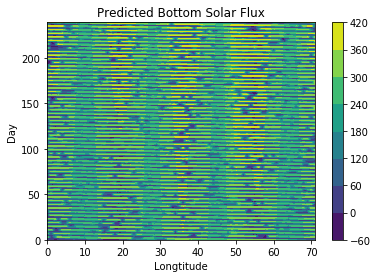

<Figure size 432x288 with 0 Axes>

In [50]:
plt.tricontour(l_list, days_list, train_pred[:,0], linewidths=0)
plt.xlabel("Longtitude")
plt.ylabel("Day")
cntr2 = plt.tricontourf(l_list, days_list, train_pred[:,0])

plt.colorbar(cntr2)
plt.title('Predicted Bottom Solar Flux')

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig("predicted.pdf")

Actual

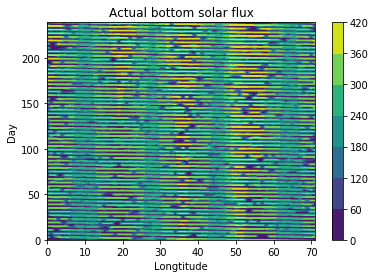

In [51]:
plt.tricontour(l_list, days_list, train_out, linewidths=0)
plt.xlabel("Longtitude")
plt.ylabel("Day")
cntr2 = plt.tricontourf(l_list, days_list, train_out)

plt.colorbar(cntr2)
plt.title('Actual bottom solar flux')

plt.subplots_adjust(hspace=0.5)
plt.show()

Difference (predicted - actual):

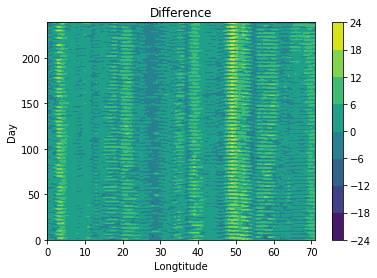

In [52]:
plt.tricontour(l_list, days_list, train_pred[:,0] - train_out, linewidths=0)
plt.xlabel("Longtitude")
plt.ylabel("Day")
cntr2 = plt.tricontourf(l_list, days_list, train_pred[:,0] - train_out)

plt.colorbar(cntr2)
plt.title('Difference')

plt.subplots_adjust(hspace=0.5)
plt.show()

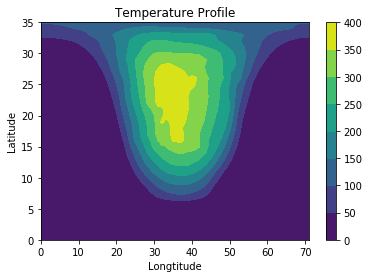

In [53]:
plt.contourf(bsf[1,:,:])
plt.colorbar()
plt.title("Temperature Profile")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

In [54]:
pred_contour = np.full((240, 72), np.nan)

In [55]:
pred_contour

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [56]:
pred_contour = np.full((240, 72), np.nan)
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
    pred_contour[day][l_point] = train_pred[i]
days_list = np.array(days_list)
l_list = np.array(l_list)

out_contour = np.full((240, 72), np.nan)

for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    out_contour[day][l_point] = train_out[i]
    


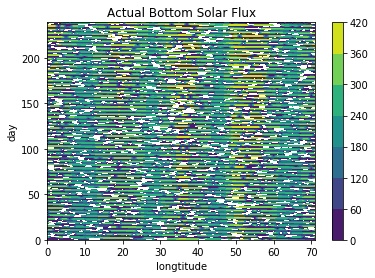

<Figure size 432x288 with 0 Axes>

In [57]:
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Actual")

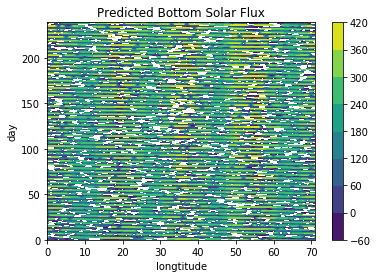

<Figure size 432x288 with 0 Axes>

In [58]:
plt.contourf(pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Predicted")

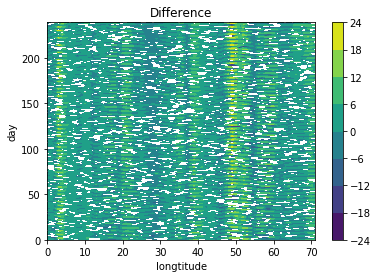

<Figure size 432x288 with 0 Axes>

In [59]:
plt.contourf(pred_contour - out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Difference.PNG")

In [60]:
1

1

In [61]:
corr_matrix = e_d.corr()

In [62]:
coefficients = corr_matrix.iloc[:,107]

In [77]:
coefficients[:52] #temperature

0     0.736909
1     0.606773
2     0.518567
3     0.432219
4     0.367792
5     0.315021
6     0.275256
7     0.243601
8     0.215447
9     0.189032
10    0.156764
11    0.126433
12    0.101370
13    0.080297
14    0.051788
15    0.023783
16   -0.012175
17   -0.069813
18   -0.101063
19   -0.072736
20    0.044425
21    0.135187
22    0.205835
23    0.242987
24    0.258347
25    0.234141
26    0.141160
27    0.000238
28   -0.147368
29   -0.249324
30   -0.306729
31   -0.348940
32   -0.387446
33   -0.395269
34   -0.365810
35   -0.285679
36   -0.232303
37   -0.187120
38   -0.058104
39    0.145280
40    0.335841
41    0.463284
42    0.516391
43    0.476357
44    0.334785
45    0.152026
46    0.031495
47   -0.015819
48   -0.057126
49   -0.004264
50    0.146491
51    0.687656
Name: 107, dtype: float64

In [78]:
coefficients[52:104] #dust profile

52    -0.016757
53    -0.016755
54    -0.016752
55    -0.016748
56    -0.016745
57    -0.016744
58    -0.016743
59    -0.016742
60    -0.016741
61    -0.016739
62    -0.016738
63    -0.016736
64    -0.016734
65    -0.016731
66    -0.016729
67    -0.016724
68    -0.016719
69    -0.016703
70    -0.016676
71    -0.016635
72    -0.016575
73    -0.016485
74    -0.016349
75    -0.016142
76    -0.015822
77    -0.015338
78    -0.014624
79    -0.013602
80    -0.012163
81    -0.010212
82    -0.007636
83    -0.004397
84    -0.000473
85     0.004021
86     0.008762
87     0.012988
88     0.015932
89     0.015590
90    -0.008069
91    -0.016764
92    -0.016764
93    -0.016764
94    -0.016764
95    -0.016764
96    -0.016764
97    -0.016764
98    -0.016763
99    -0.016763
100   -0.016763
101   -0.016763
102   -0.016762
103   -0.016759
Name: 107, dtype: float64

In [79]:
coefficients[104] #albedo

-0.046151656577810944

In [80]:
coefficients[105] #surface temp

0.919865360926923

In [81]:
coefficients[106] #top solar flux

0.9974379705040396

In [82]:
coefficients[107] #bottom solar flux, should be 1

1.0

In [84]:
lin_reg.coef_[0,:52]

array([-1.05623625e-01,  3.17872167e-02,  6.61410391e-03, -3.78957391e-03,
        2.81265378e-03,  4.47609425e-02,  1.31380692e-01, -2.45068058e-01,
        5.27650237e-01, -1.40616095e+00,  2.60813713e+00, -2.47254062e+00,
        1.07214093e+00, -3.21219414e-02,  3.56724039e-02, -2.74784118e-03,
       -5.21094620e-01,  2.68625677e-01,  3.25071812e-02,  4.41939235e-02,
       -7.55743906e-02,  5.79662435e-02, -4.28796411e-02,  9.17764157e-02,
       -9.50730294e-02,  3.31816003e-02, -2.79394165e-02,  2.73752883e-02,
       -2.06475463e-02,  1.02499798e-02,  8.63604248e-03, -3.47818732e-02,
        5.69944233e-02, -3.83428186e-02,  2.85370015e-02, -2.28082389e-03,
       -4.35690284e-02,  5.28702289e-02, -1.31182075e-02,  1.15976706e-02,
       -4.20143008e-02,  8.98860469e-02, -5.54070175e-02,  1.40771642e-02,
       -1.67321265e-02,  2.07199305e-02, -1.95932686e-02, -1.08088925e-02,
        3.76289040e-02, -3.52329835e-02, -9.36470926e-04,  2.36572921e-02],
      dtype=float32)

In [85]:
lin_reg.coef_[0,52:104]

array([ 4.8717446e+00, -8.5882587e+00,  6.7011447e+00,  2.3359545e+01,
       -4.4053627e+01,  6.1669811e+01, -4.9258144e+01,  1.0488945e+02,
       -3.8250629e+02, -7.5647907e+00,  6.7183775e-01, -1.0354997e+00,
        1.2631504e+01,  1.8692635e+01,  2.4251226e+01,  3.0260086e+01,
        3.8526333e+01,  3.9531437e+01,  3.8684776e+01,  3.7577766e+01,
        3.7548241e+01,  2.5531723e+01,  6.1217399e+00, -1.4359104e+01,
       -4.1672813e+01, -3.6366646e+01, -2.6481392e+00,  4.1048920e+01,
        3.5313148e+01, -3.8595566e+01, -3.0780476e+01,  5.2673603e+01,
       -2.9531534e+01,  8.4911680e+00, -9.8157477e-01, -1.1808044e-01,
        2.7869344e-03,  1.9527463e-02, -1.4060190e-03,  1.3137827e+01,
        1.0928448e+01, -2.9264016e-02,  4.8720341e+00,  1.9025781e+00,
        1.3170637e+00,  7.2065668e+00,  4.3539972e+00,  2.3008473e+00,
       -7.8534806e-01, -5.9627872e+00, -2.1806979e+00,  9.1822815e-01],
      dtype=float32)

In [86]:
lin_reg.coef_[0,104]

-0.09383151

In [87]:
lin_reg.coef_[0,105]

-0.08906174

In [88]:
lin_reg.coef_[0,106]

1.02946